In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os

base_dir = "/kaggle/input/cervical-cancer-largest-dataset-sipakmed"
categories = ["im_Dyskeratotic", "im_Koilocytotic", "im_Metaplastic", 
              "im_Parabasal", "im_Superficial-Intermediate"]

In [3]:
def create_image_paths_dataframe(base_dir, categories):
    data = []  

    for category in categories:
        category_path = os.path.join(base_dir, category, category, "CROPPED")
        
        image_files = [f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))]

        for image_file in image_files:
            img_path = os.path.join(category_path, image_file)
            data.append({'image_path': img_path, 'label': category})

    df_image_paths = pd.DataFrame(data)

    return df_image_paths

# function from https://www.kaggle.com/code/nirmalgaud/cervical-cancer-classification

In [4]:
data = create_image_paths_dataframe(base_dir, categories)
data

,image_path,label
0,/kaggle/input/cervical-cancer-largest-dataset-...,im_Dyskeratotic
1,/kaggle/input/cervical-cancer-largest-dataset-...,im_Dyskeratotic
2,/kaggle/input/cervical-cancer-largest-dataset-...,im_Dyskeratotic
3,/kaggle/input/cervical-cancer-largest-dataset-...,im_Dyskeratotic
4,/kaggle/input/cervical-cancer-largest-dataset-...,im_Dyskeratotic
...,...,...
4044,/kaggle/input/cervical-cancer-largest-dataset-...,im_Superficial-Intermediate
4045,/kaggle/input/cervical-cancer-largest-dataset-...,im_Superficial-Intermediate
4046,/kaggle/input/cervical-cancer-largest-dataset-...,im_Superficial-Intermediate
4047,/kaggle/input/cervical-cancer-largest-dataset-...,im_Superficial-Intermediate


In [5]:
from fastai.vision.all import *

In [6]:
dls = ImageDataLoaders.from_df(data, '../../', item_tfms=Resize(224))

/opt/conda/lib/python3.10/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


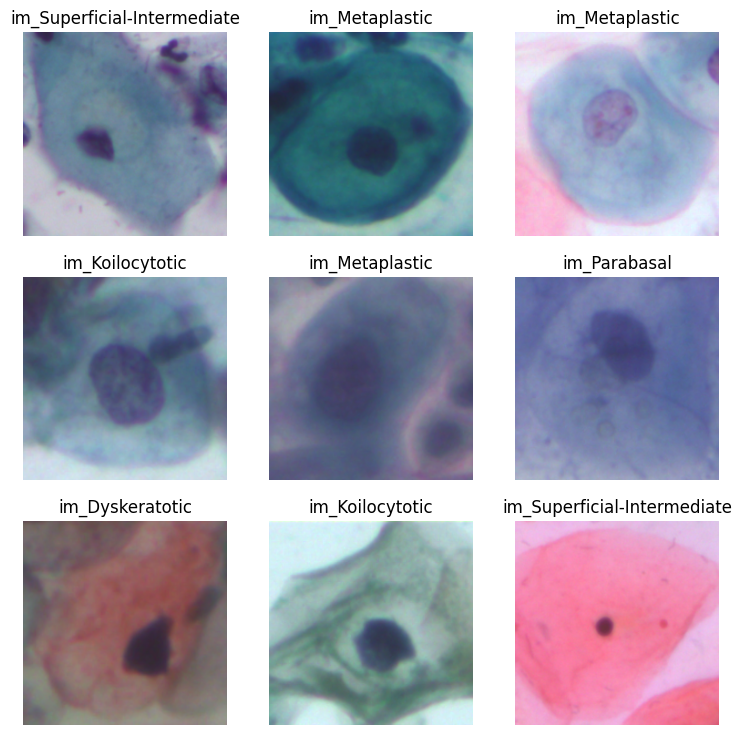

In [7]:
dls.show_batch()

In [8]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


model.safetensors:   0%|          | 0.00/178M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,error_rate,time
0,0.846444,0.285469,0.091471,01:04


epoch,train_loss,valid_loss,error_rate,time
0,0.257253,0.215785,0.063041,01:10
1,0.201831,0.174360,0.059333,01:10
2,0.124545,0.167381,0.060569,01:10
